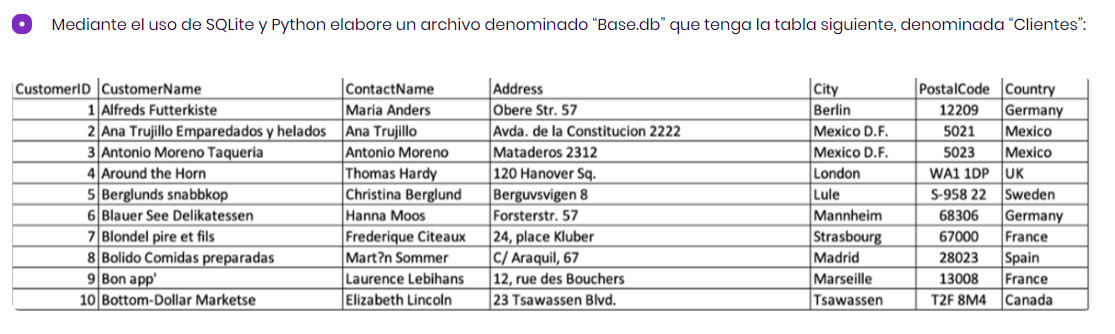

In [1]:
import sqlite3

In [3]:
# Creamos al conección

conn = sqlite3.connect('Base.db')

In [32]:
conn.cursor()

In [4]:
cur = conn.cursor()

In [5]:
# creamos la tabla Clientes
cur.execute("""
    CREATE TABLE Clientes(
      CustomerID INTEGER PRIMARY KEY,
      CustomerName TEXT NOT NULL,
      ContactName TEXT NOR NULL,
      Address TEXT,
      City TEXT,
      PostalCode INTEGER,
      Country TEXT,
      PurchaseUSD INTEGER);
""")

In [6]:
# Insertamos valores

lista_clientes= [
    ('Alfreds Futterkiste','Maria Anders','Obere Str. 57','Berlin',12209,'Germany',14861),
    ('Ana Trujillo Emparedados y helados','Ana Trujillo','Avda. de la Constitucion 2222','Mexico D.F.',5021,'Mexico',9900),
    ('Antonio Moreno Taqueria','Antonio Moreno','Mataderos 2312','Mexico D.F.',5023,'Mexico',7735),
    ('Around the Horn','Thomas Hardy','120 Hanover Sq.','London','WA1 1DP','UK',10295),
    ('Berglunds snabbkop','Christina Berglund','Berguvsvegen 8','Lule','S-958 22','Sweden',6755),
    ('Blauer See Delikatessen','Hanna Moos','Forsterstr. 57','Mannheim',68306,'Germany',12721),
    ('Blondel pire et fils','Frederique Citeaux','24 place Kliber','Strasbourg',67000,'France',11426),
    ('Bolido Comidas preparadas','Martin Sommer','C/ Araquil, 67','Madrid',28023,'Spain',17246),
    ('Bon app','Laurence Lebihans',"12, rue des Bouchers",'Marseille',13008,'France',11816),
    ('Bottom-Dollar Marketse','Elizabeth Lincoln','23 Tsawassen Blvd.','Tsawassen','T2F 8M4','Canada',6526)
]

In [7]:
# insertamos valores
cur.executemany(f"INSERT INTO Clientes(CustomerName, ContactName, Address, City, PostalCode, Country, PurchaseUSD) VALUES (?,?,?,?,?,?,?);", lista_clientes)
conn.commit()

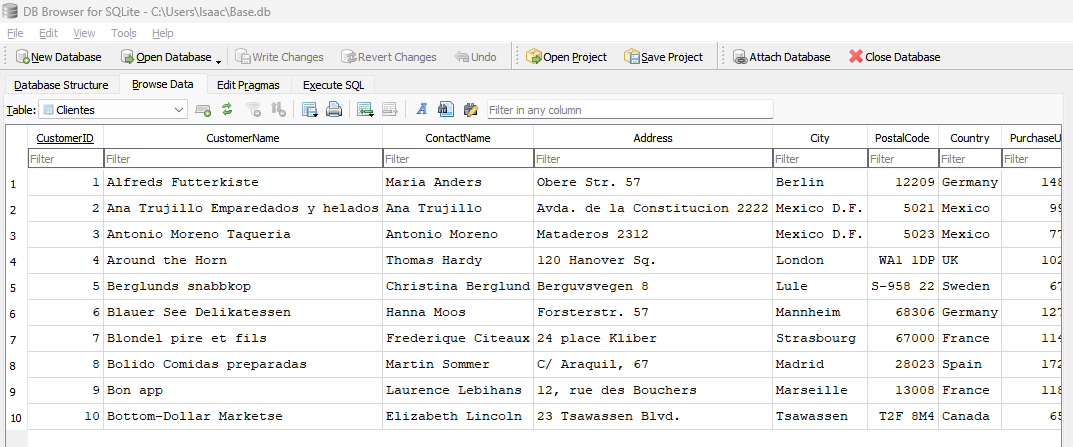

* Genere el archivo ”Operaciones.sql” que detalle cada una de las acciones necesarias para crear la base de datos previa. 

In [8]:
for line in conn.iterdump():
    print(line)

BEGIN TRANSACTION;
CREATE TABLE Clientes(
      CustomerID INTEGER PRIMARY KEY,
      CustomerName TEXT NOT NULL,
      ContactName TEXT NOR NULL,
      Address TEXT,
      City TEXT,
      PostalCode INTEGER,
      Country TEXT,
      PurchaseUSD INTEGER);
INSERT INTO "Clientes" VALUES(1,'Alfreds Futterkiste','Maria Anders','Obere Str. 57','Berlin',12209,'Germany',14861);
INSERT INTO "Clientes" VALUES(2,'Ana Trujillo Emparedados y helados','Ana Trujillo','Avda. de la Constitucion 2222','Mexico D.F.',5021,'Mexico',9900);
INSERT INTO "Clientes" VALUES(3,'Antonio Moreno Taqueria','Antonio Moreno','Mataderos 2312','Mexico D.F.',5023,'Mexico',7735);
INSERT INTO "Clientes" VALUES(4,'Around the Horn','Thomas Hardy','120 Hanover Sq.','London','WA1 1DP','UK',10295);
INSERT INTO "Clientes" VALUES(5,'Berglunds snabbkop','Christina Berglund','Berguvsvegen 8','Lule','S-958 22','Sweden',6755);
INSERT INTO "Clientes" VALUES(6,'Blauer See Delikatessen','Hanna Moos','Forsterstr. 57','Mannheim',68306,'

In [9]:
with open('Operaciones.sql','w') as _file:
    for line in conn.iterdump():
        _file.write(f'{line}\n')

* Extraiga mediante una consulta en Python los primeros 5 clientes de la base de datos previa

In [10]:
conn.execute("SELECT * FROM Clientes LIMIT 5;").fetchall()

[(1,
  'Alfreds Futterkiste',
  'Maria Anders',
  'Obere Str. 57',
  'Berlin',
  12209,
  'Germany',
  14861),
 (2,
  'Ana Trujillo Emparedados y helados',
  'Ana Trujillo',
  'Avda. de la Constitucion 2222',
  'Mexico D.F.',
  5021,
  'Mexico',
  9900),
 (3,
  'Antonio Moreno Taqueria',
  'Antonio Moreno',
  'Mataderos 2312',
  'Mexico D.F.',
  5023,
  'Mexico',
  7735),
 (4,
  'Around the Horn',
  'Thomas Hardy',
  '120 Hanover Sq.',
  'London',
  'WA1 1DP',
  'UK',
  10295),
 (5,
  'Berglunds snabbkop',
  'Christina Berglund',
  'Berguvsvegen 8',
  'Lule',
  'S-958 22',
  'Sweden',
  6755)]

In [11]:
# cerramos la coneccion a la BD
conn.close()